In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import os

import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
nasdaq = pd.read_csv('./data/nasdaq.csv', index_col=0, parse_dates=True)
snp = pd.read_csv('./data/snp500.csv', index_col=0, parse_dates=True)
ftse = pd.read_csv('./data/ftse.csv', index_col=0, parse_dates=True)
dax = pd.read_csv('./data/dax.csv', index_col=0, parse_dates=True)
nikkei = pd.read_csv('./data/nikkei.csv', index_col=1, parse_dates=True)
hangseng = pd.read_csv('./data/hang.csv', index_col=0, parse_dates=True)
sanghai = pd.read_csv('./data/sanghai.csv', index_col=0, parse_dates=True)
kospi = pd.read_csv('./data/kospi.csv', index_col=0, parse_dates=True)
kosdaq = pd.read_csv('./data/kosdaq.csv', index_col=0, parse_dates=True)

In [3]:
nasdaq.sort_index(inplace=True)
snp.sort_index(inplace=True)
ftse.sort_index(inplace=True)
dax.sort_index(inplace=True)
nikkei.sort_index(inplace=True)
hangseng.sort_index(inplace=True)
sanghai.sort_index(inplace=True)
kospi.sort_index(inplace=True)
kosdaq.sort_index(inplace=True)

In [4]:
nasdaq['Close'] = nasdaq.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Close'] = dax.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Close'] = nikkei['종가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Close'] = hangseng.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Open'] = nasdaq.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Open'] = dax.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Open'] = nikkei['오픈'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Open'] = hangseng.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['High'] = nasdaq.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['High'] = dax.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['High'] = nikkei['고가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['High'] = hangseng.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Low'] = nasdaq.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Low'] = dax.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Low'] = nikkei['저가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Low'] = hangseng.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))

In [5]:
df_list = [nasdaq, snp, ftse, dax, nikkei, hangseng, sanghai, kospi]

In [6]:
df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
df8 = []
df9 = []
for df in df_list:
    df1.append((df.Close - df.Close.shift(1)) / df.Close.shift(1))
    df2.append((df.Close - df.Open) / df.Open)
    df3.append((df.High - df.Low) / df.Low)
    df4.append((df.High - df.Close) / df.Close)
    df5.append((df.Low - df.Close) / df.Close)
    df6.append((df.Open - df.Open.shift(1)) / df.Open.shift(1))
    df7.append((df.Open - df.Close.shift(1)) / df.Close.shift(1))
    df8.append((df.High - df.High.shift(1)) / df.High.shift(1))
    df9.append((df.Low - df.Low.shift(1)) / df.Low.shift(1))

In [7]:
df1 = pd.concat(df1, axis=1)
df2 = pd.concat(df2, axis=1)
df3 = pd.concat(df3, axis=1)
df4 = pd.concat(df4, axis=1)
df5 = pd.concat(df5, axis=1)
df6 = pd.concat(df6, axis=1)
df7 = pd.concat(df7, axis=1)
df8 = pd.concat(df8, axis=1)
df9 = pd.concat(df9, axis=1)

tail = '_1'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df1.columns = col_names

tail = '_2'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df2.columns = col_names

tail = '_3'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df3.columns = col_names

tail = '_4'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df4.columns = col_names

tail = '_5'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df5.columns = col_names

tail = '_6'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df6.columns = col_names

tail = '_7'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df7.columns = col_names

tail = '_8'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df8.columns = col_names

tail = '_9'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df9.columns = col_names

In [8]:
final_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

In [9]:
final_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),final_df,how='outer', left_index=True, right_index=True)

In [10]:
final_df.fillna(0, inplace=True)
final_df = final_df.loc['2001-01-03' : '2021-11-11']

In [11]:
y = (kospi.Close - kospi.Open) / kospi.Open

In [12]:
y.name = 'y'
y = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),y,how='outer', left_index=True, right_index=True)

In [13]:
y_df = y.loc['2001-01-03' : '2021-11-11']

In [14]:
y_df['b'] = y_df.y.apply(lambda x : x > 0)

/var/folders/fy/f7hm_xxs1bb1k3q0vxk7zc_w0000gn/T/ipykernel_7022/3400580676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['b'] = y_df.y.apply(bull_or_bear)


In [15]:
y_df

,y,b
2001-01-03,0.016948,1
2001-01-04,0.011767,1
2001-01-05,0.038085,1
2001-01-06,NaN,0
2001-01-07,NaN,0
...,...,...
2021-11-07,NaN,0
2021-11-08,-0.001740,0
2021-11-09,0.001457,1
2021-11-10,-0.005866,0


In [16]:
holiday_index = y_df[y_df.y.isnull()].index

In [17]:
from datetime import timedelta

In [107]:
# N번째 휴일의 시작 날짜, 처음 값을 0번째 인덱스 값으로 지정.
start_day = holiday_index[0]

# N번째 휴일의 종료 날짜
end_day = holiday_index[0]

# 휴일기간을 담기위한 목록
holiday_list = []

for i in range(1, len(holiday_index)) :
    
    # N번째 휴일 날짜를 N-1번째 휴일 날짜와 비교해서, 날짜의 차이가 1일이면
    if (holiday_index[i] - holiday_index[i-1]) == timedelta(days=1) :
        
        # 연속된 휴일로 보고 휴일 종료 날짜를 +1일
        end_day = holiday_index[i]
        
    # N번째 휴일 날짜와 N-1번째 휴일 날짜를 비교해서, 날짜의 차이가 1일이 아니면 -> 새로운 휴일의 시작으로 보고 시작과 끝을 바꿔줌.
    else :
        
        # 새로운 휴일을 시작하기 전에 정해진(이전 휴일기간)의 시작과 끝 날짜를 리스트에 담아줌.
        holiday_list.append((start_day, end_day))
        
        # 새로운 휴일 시작 날짜를 새로 지정
        start_day = holiday_index[i]
        
        # 새로운 휴일 종료 날짜도 새로 지정
        end_day = holiday_index[i]

In [108]:
one_day = timedelta(days=1)

X = []
y = []

temp = None

for idx in range(len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start - one_day : holiday_end]
    
#     if len(n_holiday) > 3:
#         temp = n_holiday
#         break
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1

    # KOSPI, KOSDAQ을 제외한 지수들의 누적수익률 데이터
    X_data = n_holiday_change.loc[holiday_end]

    # D+1일 KOSPI의 실제 수익률 y
    y_data = y_df.loc[target_day]['b']

    X.append(X_data.values)
    y.append(y_data)

In [109]:
X = np.array(X)
y = np.array(y)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm

In [112]:
log = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
lgbm = lightgbm.LGBMClassifier()

In [113]:
log.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [114]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [115]:
print('--------------------log--------------------')
print('train:', log.score(X_train, y_train))
print('test:', log.score(X_test, y_test))
print('accuracy:', accuracy_score(log.predict(X_test), y_test))
print('recall', recall_score(log.predict(X_test), y_test))
print('precision', precision_score(log.predict(X_test), y_test))
print('f1', f1_score(log.predict(X_test), y_test))


print('\n\n--------------------rfc--------------------')
print('train:', rfc.score(X_train, y_train))
print('test:', rfc.score(X_test, y_test))
print('accuracy:', accuracy_score(rfc.predict(X_test), y_test))
print('recall', recall_score(rfc.predict(X_test), y_test))
print('precision', precision_score(rfc.predict(X_test), y_test))
print('f1', f1_score(rfc.predict(X_test), y_test))

print('\n\n--------------------gbc--------------------')
print('train:', gbc.score(X_train, y_train))
print('test:', gbc.score(X_test, y_test))
print('accuracy:', accuracy_score(gbc.predict(X_test), y_test))
print('recall', recall_score(gbc.predict(X_test), y_test))
print('precision', precision_score(gbc.predict(X_test), y_test))
print('f1', f1_score(gbc.predict(X_test), y_test))

print('\n\n--------------------lgbm--------------------')
print('train:', lgbm.score(X_train, y_train))
print('test:', lgbm.score(X_test, y_test))
print('accuracy:', accuracy_score(lgbm.predict(X_test), y_test))
print('recall', recall_score(lgbm.predict(X_test), y_test))
print('precision', precision_score(lgbm.predict(X_test), y_test))
print('f1', f1_score(lgbm.predict(X_test), y_test))

--------------------log--------------------
train: 0.5353535353535354
test: 0.5252525252525253
accuracy: 0.5252525252525253
recall 0.5294117647058824
precision 0.06338028169014084
f1 0.11320754716981132


--------------------rfc--------------------
train: 1.0
test: 0.5353535353535354
accuracy: 0.5353535353535354
recall 0.5172413793103449
precision 0.4225352112676056
f1 0.46511627906976744


--------------------gbc--------------------
train: 0.9483726150392817
test: 0.5589225589225589
accuracy: 0.5589225589225589
recall 0.5419847328244275
precision 0.5
f1 0.5201465201465201


--------------------lgbm--------------------
train: 1.0
test: 0.5555555555555556
accuracy: 0.5555555555555556
recall 0.5367647058823529
precision 0.5140845070422535
f1 0.525179856115108


In [117]:
y_encoded = tf.keras.utils.to_categorical(y)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.3)

In [120]:
activation = tf.nn.leaky_relu

model = models.Sequential()
model.add(layers.Dense(32, input_dim = 72, activation = activation))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                2336      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,402
Trainable params: 2,402
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
%%time
history = model.fit(X_train, y_train, validation_split=0.3, epochs=300, batch_size=1)

Epoch 1/300
 47/581 [=>............................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5532  

2021-11-26 10:09:12.542310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


566/581 [============================>.] - ETA: 0s - loss: 0.6936 - accuracy: 0.5000

2021-11-26 10:09:14.428587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


581/581 [==============================] - 2s 4ms/step - loss: 0.6934 - accuracy: 0.5009 - val_loss: 0.6933 - val_accuracy: 0.4920
Epoch 2/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6906 - accuracy: 0.5284 - val_loss: 0.6899 - val_accuracy: 0.5280
Epoch 3/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6872 - accuracy: 0.5577 - val_loss: 0.6915 - val_accuracy: 0.5240
Epoch 4/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6831 - accuracy: 0.5422 - val_loss: 0.6869 - val_accuracy: 0.5360
Epoch 5/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6781 - accuracy: 0.5714 - val_loss: 0.6992 - val_accuracy: 0.5120
Epoch 6/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6756 - accuracy: 0.5680 - val_loss: 0.6898 - val_accuracy: 0.5360
Epoch 7/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6695 - accuracy: 0.5886 - val_loss: 0.6883 - val_accuracy: 0.5400
Epoch 8/300

581/581 [==============================] - 2s 4ms/step - loss: 0.6095 - accuracy: 0.6695 - val_loss: 0.7645 - val_accuracy: 0.4800
Epoch 59/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6078 - accuracy: 0.6695 - val_loss: 0.7613 - val_accuracy: 0.5160
Epoch 60/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6069 - accuracy: 0.6713 - val_loss: 0.7713 - val_accuracy: 0.4600
Epoch 61/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6053 - accuracy: 0.6678 - val_loss: 0.7709 - val_accuracy: 0.4560
Epoch 62/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6038 - accuracy: 0.6695 - val_loss: 0.7911 - val_accuracy: 0.4840
Epoch 63/300
581/581 [==============================] - 2s 4ms/step - loss: 0.6032 - accuracy: 0.6764 - val_loss: 0.7813 - val_accuracy: 0.4680
Epoch 64/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5983 - accuracy: 0.6816 - val_loss: 0.7736 - val_accuracy: 0.5120
Epoch

Epoch 115/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5471 - accuracy: 0.7298 - val_loss: 0.8707 - val_accuracy: 0.4760
Epoch 116/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5484 - accuracy: 0.7367 - val_loss: 0.8759 - val_accuracy: 0.4760
Epoch 117/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5453 - accuracy: 0.7263 - val_loss: 0.8721 - val_accuracy: 0.4760
Epoch 118/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5449 - accuracy: 0.7246 - val_loss: 0.8794 - val_accuracy: 0.4800
Epoch 119/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5428 - accuracy: 0.7108 - val_loss: 0.8854 - val_accuracy: 0.4760
Epoch 120/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5433 - accuracy: 0.7298 - val_loss: 0.8673 - val_accuracy: 0.4920
Epoch 121/300
581/581 [==============================] - 2s 4ms/step - loss: 0.5426 - accuracy: 0.7470 - val_loss: 0.8969 - val_ac

581/581 [==============================] - 2s 4ms/step - loss: 0.4967 - accuracy: 0.7625 - val_loss: 0.9785 - val_accuracy: 0.4680
Epoch 172/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4945 - accuracy: 0.7659 - val_loss: 0.9688 - val_accuracy: 0.4800
Epoch 173/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4905 - accuracy: 0.7642 - val_loss: 0.9970 - val_accuracy: 0.5000
Epoch 174/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4934 - accuracy: 0.7780 - val_loss: 0.9740 - val_accuracy: 0.4640
Epoch 175/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4926 - accuracy: 0.7711 - val_loss: 0.9641 - val_accuracy: 0.4960
Epoch 176/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4901 - accuracy: 0.7780 - val_loss: 0.9661 - val_accuracy: 0.4880
Epoch 177/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4910 - accuracy: 0.7728 - val_loss: 0.9682 - val_accuracy: 0.4840

581/581 [==============================] - 2s 4ms/step - loss: 0.4428 - accuracy: 0.8021 - val_loss: 1.0565 - val_accuracy: 0.4760
Epoch 228/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4401 - accuracy: 0.8038 - val_loss: 1.0564 - val_accuracy: 0.4920
Epoch 229/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4362 - accuracy: 0.8158 - val_loss: 1.0965 - val_accuracy: 0.4600
Epoch 230/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4396 - accuracy: 0.7952 - val_loss: 1.0614 - val_accuracy: 0.4720
Epoch 231/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4367 - accuracy: 0.7952 - val_loss: 1.0704 - val_accuracy: 0.4840
Epoch 232/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4369 - accuracy: 0.8107 - val_loss: 1.0630 - val_accuracy: 0.4760
Epoch 233/300
581/581 [==============================] - 2s 4ms/step - loss: 0.4394 - accuracy: 0.7952 - val_loss: 1.0926 - val_accuracy: 0.5040

581/581 [==============================] - 2s 4ms/step - loss: 0.3947 - accuracy: 0.8313 - val_loss: 1.1549 - val_accuracy: 0.4760
Epoch 284/300
581/581 [==============================] - 2s 4ms/step - loss: 0.3954 - accuracy: 0.8158 - val_loss: 1.1585 - val_accuracy: 0.5000
Epoch 285/300
581/581 [==============================] - 2s 4ms/step - loss: 0.3946 - accuracy: 0.8382 - val_loss: 1.1485 - val_accuracy: 0.4760
Epoch 286/300
581/581 [==============================] - 2s 4ms/step - loss: 0.3903 - accuracy: 0.8382 - val_loss: 1.1620 - val_accuracy: 0.4960
Epoch 287/300
581/581 [==============================] - 2s 4ms/step - loss: 0.3909 - accuracy: 0.8296 - val_loss: 1.1622 - val_accuracy: 0.4760
Epoch 288/300
581/581 [==============================] - 2s 4ms/step - loss: 0.3907 - accuracy: 0.8313 - val_loss: 1.1530 - val_accuracy: 0.5000
Epoch 289/300
581/581 [==============================] - 2s 4ms/step - loss: 0.3894 - accuracy: 0.8262 - val_loss: 1.1712 - val_accuracy: 0.4880

In [124]:
test_preds = model.predict(X_test)
train_preds = model.predict(X_train)

2021-11-26 10:21:56.283815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [125]:
from sklearn.metrics import classification_report

In [126]:
def give_list(x) :
    temp_df = pd.DataFrame(x)
    temp_df['res'] = temp_df[0] < temp_df[1]
    return temp_df['res'].apply(lambda x: int(x)).values

In [127]:
print(classification_report(give_list(test_preds), give_list(y_test)))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54       175
           1       0.54      0.50      0.52       182

    accuracy                           0.53       357
   macro avg       0.53      0.53      0.53       357
weighted avg       0.53      0.53      0.53       357



In [128]:
print(classification_report(give_list(train_preds), give_list(y_train)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       405
           1       0.76      0.72      0.74       426

    accuracy                           0.74       831
   macro avg       0.74      0.74      0.74       831
weighted avg       0.74      0.74      0.74       831



In [129]:
one_day = timedelta(days=1)

X_v = []
y_v = []
v_dates = []

temp = None

for idx in range(len(holiday_list)-300, len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start - one_day : holiday_end]
    
#     if len(n_holiday) > 3:
#         temp = n_holiday
#         break
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1

    # KOSPI, KOSDAQ을 제외한 지수들의 누적수익률 데이터
    X_data = n_holiday_change.loc[holiday_end].apply(lambda x : round(x, 4))

    # D+1일 KOSPI의 실제 수익률 y
    y_data = y_df.loc[target_day].apply(lambda x : round(x, 4))['y']
    v_dates.append(target_day)
    X_v.append(X_data.values)
    y_v.append(y_data)

In [130]:
X_v = np.array(X_v)
y_v = np.array(y_v)

In [131]:
val_preds = model.predict(X_v)

In [132]:
temp_df = pd.DataFrame(val_preds)

In [133]:
temp_df['res'] = temp_df[0] < temp_df[1]

In [134]:
temp_df['res'] = temp_df.res.apply(lambda x : int(x))

In [135]:
val_dict = {
    "date" : v_dates,
    "preds" : temp_df.res.values
}

In [136]:
val_df = pd.DataFrame(val_dict)

In [138]:
val_df.set_index('date', inplace=True)

In [139]:
val_df = pd.merge(val_df, kospi, left_index=True, right_index=True)

In [140]:
val_df

,preds,Close,Open,High,Low,Volume,Change
2016-07-25,1,2012.32,2014.74,2020.69,2006.63,350230000.0,0.0010
2016-08-01,0,2029.61,2024.71,2031.58,2024.57,369590000.0,0.0067
2016-08-08,0,2031.12,2025.55,2031.14,2018.81,270480000.0,0.0065
2016-08-16,0,2047.76,2056.00,2063.09,2047.73,374870000.0,-0.0013
2016-08-22,1,2042.16,2054.37,2054.71,2040.51,343500000.0,-0.0068
...,...,...,...,...,...,...,...
2021-10-05,0,2962.17,2998.17,2998.17,2940.59,840560000.0,-0.0189
2021-10-12,0,2916.38,2950.22,2950.94,2901.51,660180000.0,-0.0135
2021-10-18,0,3006.68,3017.48,3021.17,2990.44,926370000.0,-0.0028
2021-10-25,1,3020.54,3001.10,3025.27,2983.29,791800000.0,0.0048


In [141]:
val_df['gap'] = (val_df.Close - val_df.Open) / val_df.Open

In [142]:
val_df['cum'] = val_df['preds'] * val_df['gap']

<AxesSubplot:>

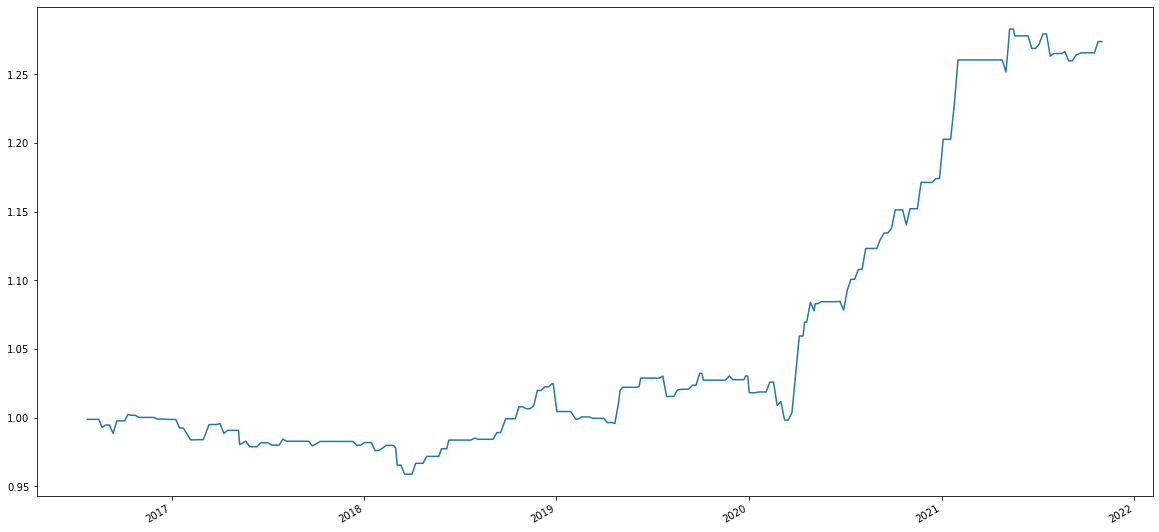

In [143]:
(val_df.cum + 1).cumprod().plot(figsize=(20,10))

In [144]:
(val_df.cum + 1).cumprod()

2016-07-25    0.998799
2016-08-01    0.998799
2016-08-08    0.998799
2016-08-16    0.998799
2016-08-22    0.992863
                ...   
2021-10-05    1.265499
2021-10-12    1.265499
2021-10-18    1.265499
2021-10-25    1.273697
2021-11-01    1.273697
Name: cum, Length: 300, dtype: float64